TensorFlow Machine Learning Project

Predicting Life Expectancy from Birth Rate usign Linear Regression

In [191]:
#Import libraries
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [192]:
#import file
data = pd.read_csv('birth_life_data_2010.txt', delimiter="\t")
data.head()

,Country,Birth rate,Life expectancy
0,Vietnam,1.822,74.828244
1,Vanuatu,3.869,70.819488
2,Tonga,3.911,72.150659
3,Timor-Leste,5.578,61.999854
4,Thailand,1.579,73.927659


In [214]:
#defining dependent and independent variables
x_train = data['Birth rate']
y_train = data['Life expectancy']

In [215]:
#Defining constants used by learning algorithm
learning_rate = 0.01
training_epochs = 100

In [216]:
#Setting up input and output nodes as placeholder which will ingest x_train and y_train data later
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

In [217]:
#Setting up weight and bias variable to 0
w = tf.Variable(0.0, name = 'weight')
b = tf.Variable(0.0, name = 'bias')
loss = tf.Variable(0.0, name = 'loss')

In [218]:
#Defining the model to predict Y (life expectancy) from X (birth rate) as Y = wX + b
def model(X, w, b):
    return tf.add(tf.multiply(X,w), b)

In [219]:
#Defining cost function
y_model = model(X, w, b)
cost = tf.square(Y - y_model)

In [220]:
#Using gradient descent with learning rate of 0.01 to minimize cost
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [221]:
#Setting up session and initializing variables (w, b)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [222]:
#Looping through to train model
for epoch in range(training_epochs):
    for x, y in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X:x, Y:y})

In [224]:
#Obtaining values of w and b
w_val, b_val = sess.run([w, b])
print ("For w and b in (y = wX + b) using huber loss function.")
print ("w = {} and b = {}".format(w_val, b_val))
print()

For w and b in (y = wX + b) using huber loss function.
w = -5.15043497086 and b = 79.4000015259


In [181]:
#clsoing the session
sess.close()

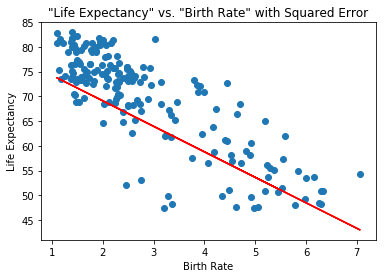

In [182]:
plt.scatter(x_train, y_train)
y_learned = (x_train * w_val) + b_val
plt.plot(x_train, y_learned, 'r')
plt.xlabel('Birth Rate')
plt.ylabel('Life Expectancy')
plt.title('"Life Expectancy" vs. "Birth Rate" with Squared Error')
plt.show()

Applying Huber Loss which reduces the weight of outliers

In [117]:
#Defining constants used by learning algorithm
learning_rate = 0.01
training_epochs = 100

In [118]:
#Setting up input and output nodes as placeholder which will ingest x_train and y_train data later
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

In [119]:
#Setting up weight and bias variable to 0
w = tf.Variable(0.0, name = 'weight')
b = tf.Variable(0.0, name = 'bias')

In [120]:
#Defining the model to predict Y (life expectancy) from X (birth rate) as Y = wX + b
def model(X, w, b):
    return tf.add(tf.multiply(X,w), b)

In [121]:
#Defining cost function
y_model = model(X, w, b)
loss = tf.square(Y - y_model)

In [158]:
#Defining Huber loss function
#delta: float, the point where the huber loss function changes from a quadratic to linear.
def huber_loss(y_true, y_predict, delta=2.0):
    err = tf.abs(y_true - y_predict)
    def func1(): return 0.5 * tf.square(err)
    def func2(): return delta * err - 0.5 * tf.square(delta)
    return tf.cond(err < delta, func1, func2)

In [159]:
hloss = huber_loss(Y, y_model)

In [160]:
#Using gradient descent with learning rate of 0.01 to minimize cost
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(hloss)

In [161]:
#Setting up session and initializing variables
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [162]:
#Looping through to train model
for epoch in range(training_epochs):
    for x, y in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X:x, Y:y})

In [163]:
#Obtaining values of w and b
w_val, b_val = sess.run([w, b])
print ("For w and b in (y = wX + b) using huber loss function.")
print ("w = {} and b = {}".format(w_val, b_val))

For w and b in (y = wX + b) using huber loss function.
w = -6.20787858963 and b = 85.6261444092


In [164]:
#clsoing the session
sess.close()

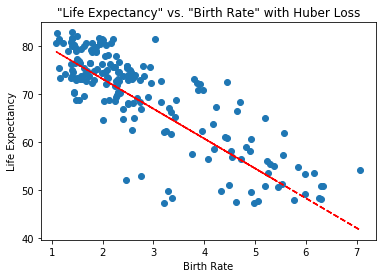

In [167]:
plt.scatter(x_train, y_train)
y_learned = (x_train * w_val) + b_val
plt.plot(x_train, y_learned, 'r--', label='dots')
plt.xlabel('Birth Rate')
plt.ylabel('Life Expectancy')
plt.title('"Life Expectancy" vs. "Birth Rate" with Huber Loss')
plt.show()